In [1]:

# Corrigindo os problemas de incompatibilidades de sklearn e Lazypredict
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.23.1

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 5.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.1 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.1 which is incompatible.


In [2]:
# Instalando o pacote lazypredict
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 248 kB 8.7 MB/s 
     |████████████████████████████████| 127.6 MB 22 kB/s 
     |████████████████████████████████| 72 kB 1.3 MB/s 
     |████████████████████████████████| 25.9 MB 1.3 MB/s 
     |████████████████████████████████| 14.5 MB 44.1 MB/s 
     |████████████████████████████████| 269 kB 67.3 MB/s 
     |████████████████████████████████| 302 kB 54.8 MB/s 
     |████████████████████████████████| 1.2 MB 51.6 MB/s 
     |████████████████████████████████| 10.1 MB 43.1 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=cf2110e67c132ffed3c59e92f7695f89f6e2e255dd5b6d9edccd689cbb6eaee5
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninst

In [1]:
# Importando pacotes
import lazypredict
from lazypredict.Supervised import LazyClassifier

import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Importando o pandas
import pandas as pd

In [3]:
# Leitura dos datasets
from google.colab import files
uploaded = files.upload()


Saving bioactivity_data_preprocessed.csv to bioactivity_data_preprocessed.csv


In [5]:
# Lendo dados de bioactividade
bioactividade = pd.read_csv("bioactivity_data_preprocessed.csv")
bioactividade

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,Intermediate,7200.00
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,Intermediate,9400.00
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,Inactive,13500.00
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,Inactive,13110.00
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],Intermediate,2000.00
...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,Inactive,10600.00
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,Inactive,10100.00
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,Inactive,11500.00
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,Inactive,10700.00


In [6]:
# Leitura dos datasets dos descritores
from google.colab import files
uploaded = files.upload()

Saving Substructure.csv to Substructure.csv


In [7]:
descritores = pd.read_csv("Substructure.csv")
descritores

,Name,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,...,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307
0,CHEMBL187579,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
1,CHEMBL188487,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
2,CHEMBL426082,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
3,CHEMBL185698,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
4,CHEMBL187717,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,CHEMBL215254,1,1,0,1,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
129,CHEMBL363535,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
130,CHEMBL227075,1,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1
131,CHEMBL187460,1,1,1,1,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1


# Modelagem dos dados

In [8]:
# Definindo as variaveis preditoras e de resposta
x = descritores.drop("Name", axis = 1)
y = bioactividade["bioactivity_class"]


In [9]:
# Feature selection

# Removendo descritores com baixa variáncia
from sklearn.feature_selection import VarianceThreshold

def remove_baixa_variancia(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]
x = remove_baixa_variancia(x, threshold=0.1)
x

,SubFP1,SubFP2,SubFP3,SubFP4,SubFP18,SubFP20,SubFP38,SubFP49,SubFP85,SubFP88,...,SubFP184,SubFP188,SubFP287,SubFP288,SubFP296,SubFP297,SubFP298,SubFP299,SubFP302,SubFP303
0,1,0,0,0,0,0,0,1,0,1,...,1,0,1,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,1,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,1,...,1,1,1,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1,1,0,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
129,1,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
130,1,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
131,1,1,1,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [10]:
# Dividindo os dados em treinamento e teste
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5, random_state=123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_treino, x_teste, y_treino, y_teste)

print(models)

100%|██████████| 29/29 [00:01<00:00, 26.89it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
SGDClassifier                      0.78               0.62    None      0.74   
DecisionTreeClassifier             0.78               0.60    None      0.73   
ExtraTreesClassifier               0.78               0.60    None      0.73   
GaussianNB                         0.76               0.58    None      0.73   
LabelSpreading                     0.73               0.58    None      0.68   
ExtraTreeClassifier                0.73               0.58    None      0.68   
BernoulliNB                        0.57               0.57    None      0.62   
LabelPropagation                   0.72               0.57    None      0.67   
BaggingClassifier                  0.79               0.57    None      0.73   
LinearDiscriminantAnalysis         0.69               0.57    None      0.69   
RandomForestClassifier             0.78 

In [11]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SGDClassifier,0.78,0.62,None,0.74,0.02
DecisionTreeClassifier,0.78,0.60,None,0.73,0.01
ExtraTreesClassifier,0.78,0.60,None,0.73,0.12
GaussianNB,0.76,0.58,None,0.73,0.02
LabelSpreading,0.73,0.58,None,0.68,0.02
ExtraTreeClassifier,0.73,0.58,None,0.68,0.01
BernoulliNB,0.57,0.57,None,0.62,0.01
LabelPropagation,0.72,0.57,None,0.67,0.02
BaggingClassifier,0.79,0.57,None,0.73,0.04


[(0.0, 1.0)]

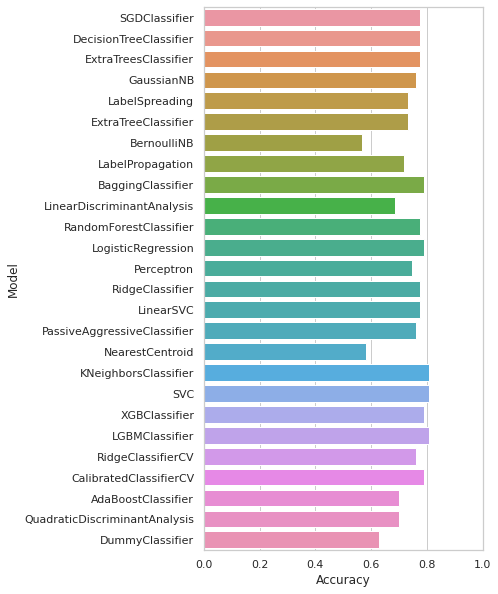

In [13]:
# Visualziação dos resultados de performance

# Gráfico de Accurary
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="Accuracy", data=predictions)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

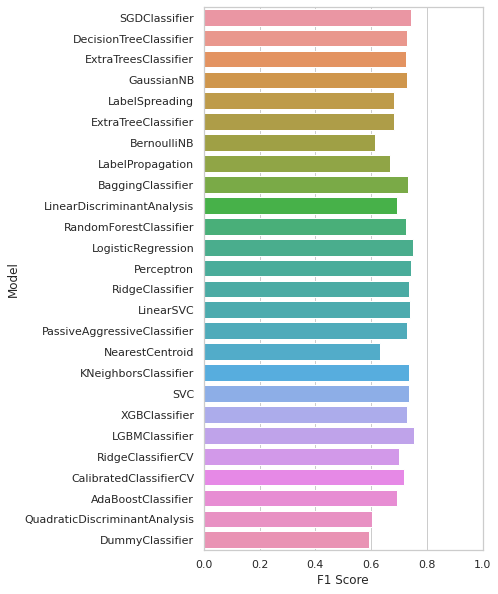

In [14]:
# Visualziação dos resultados de performance

# Gráfico de F1 Score
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="F1 Score", data=predictions)
ax.set(xlim=(0, 1))